<a href="https://colab.research.google.com/github/thisismebipin/Customer-Churn-Analysis/blob/main/Predictive_Modeling/Predictive_Modeling_CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load csv
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/PY/WIL/ATS_Final_Preprocessed_Dataset.csv")
df.head()
df.info()
df.isnull().sum()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PY/WIL/ATS_Final_Preprocessed_Dataset.csv'

# Intro - Predictive Modelling


As seen from df.info(), there are no missing values, and all columns except Churn are float64, indicating they are already standardized or encoded).

As a predictive modeling specialist, we will now use the **TensorFlow/Keras** library to build an Artificial Neural Network (ANN). We will follow standard industry procedures to complete the task step-by-step, from data splitting to model evaluation.

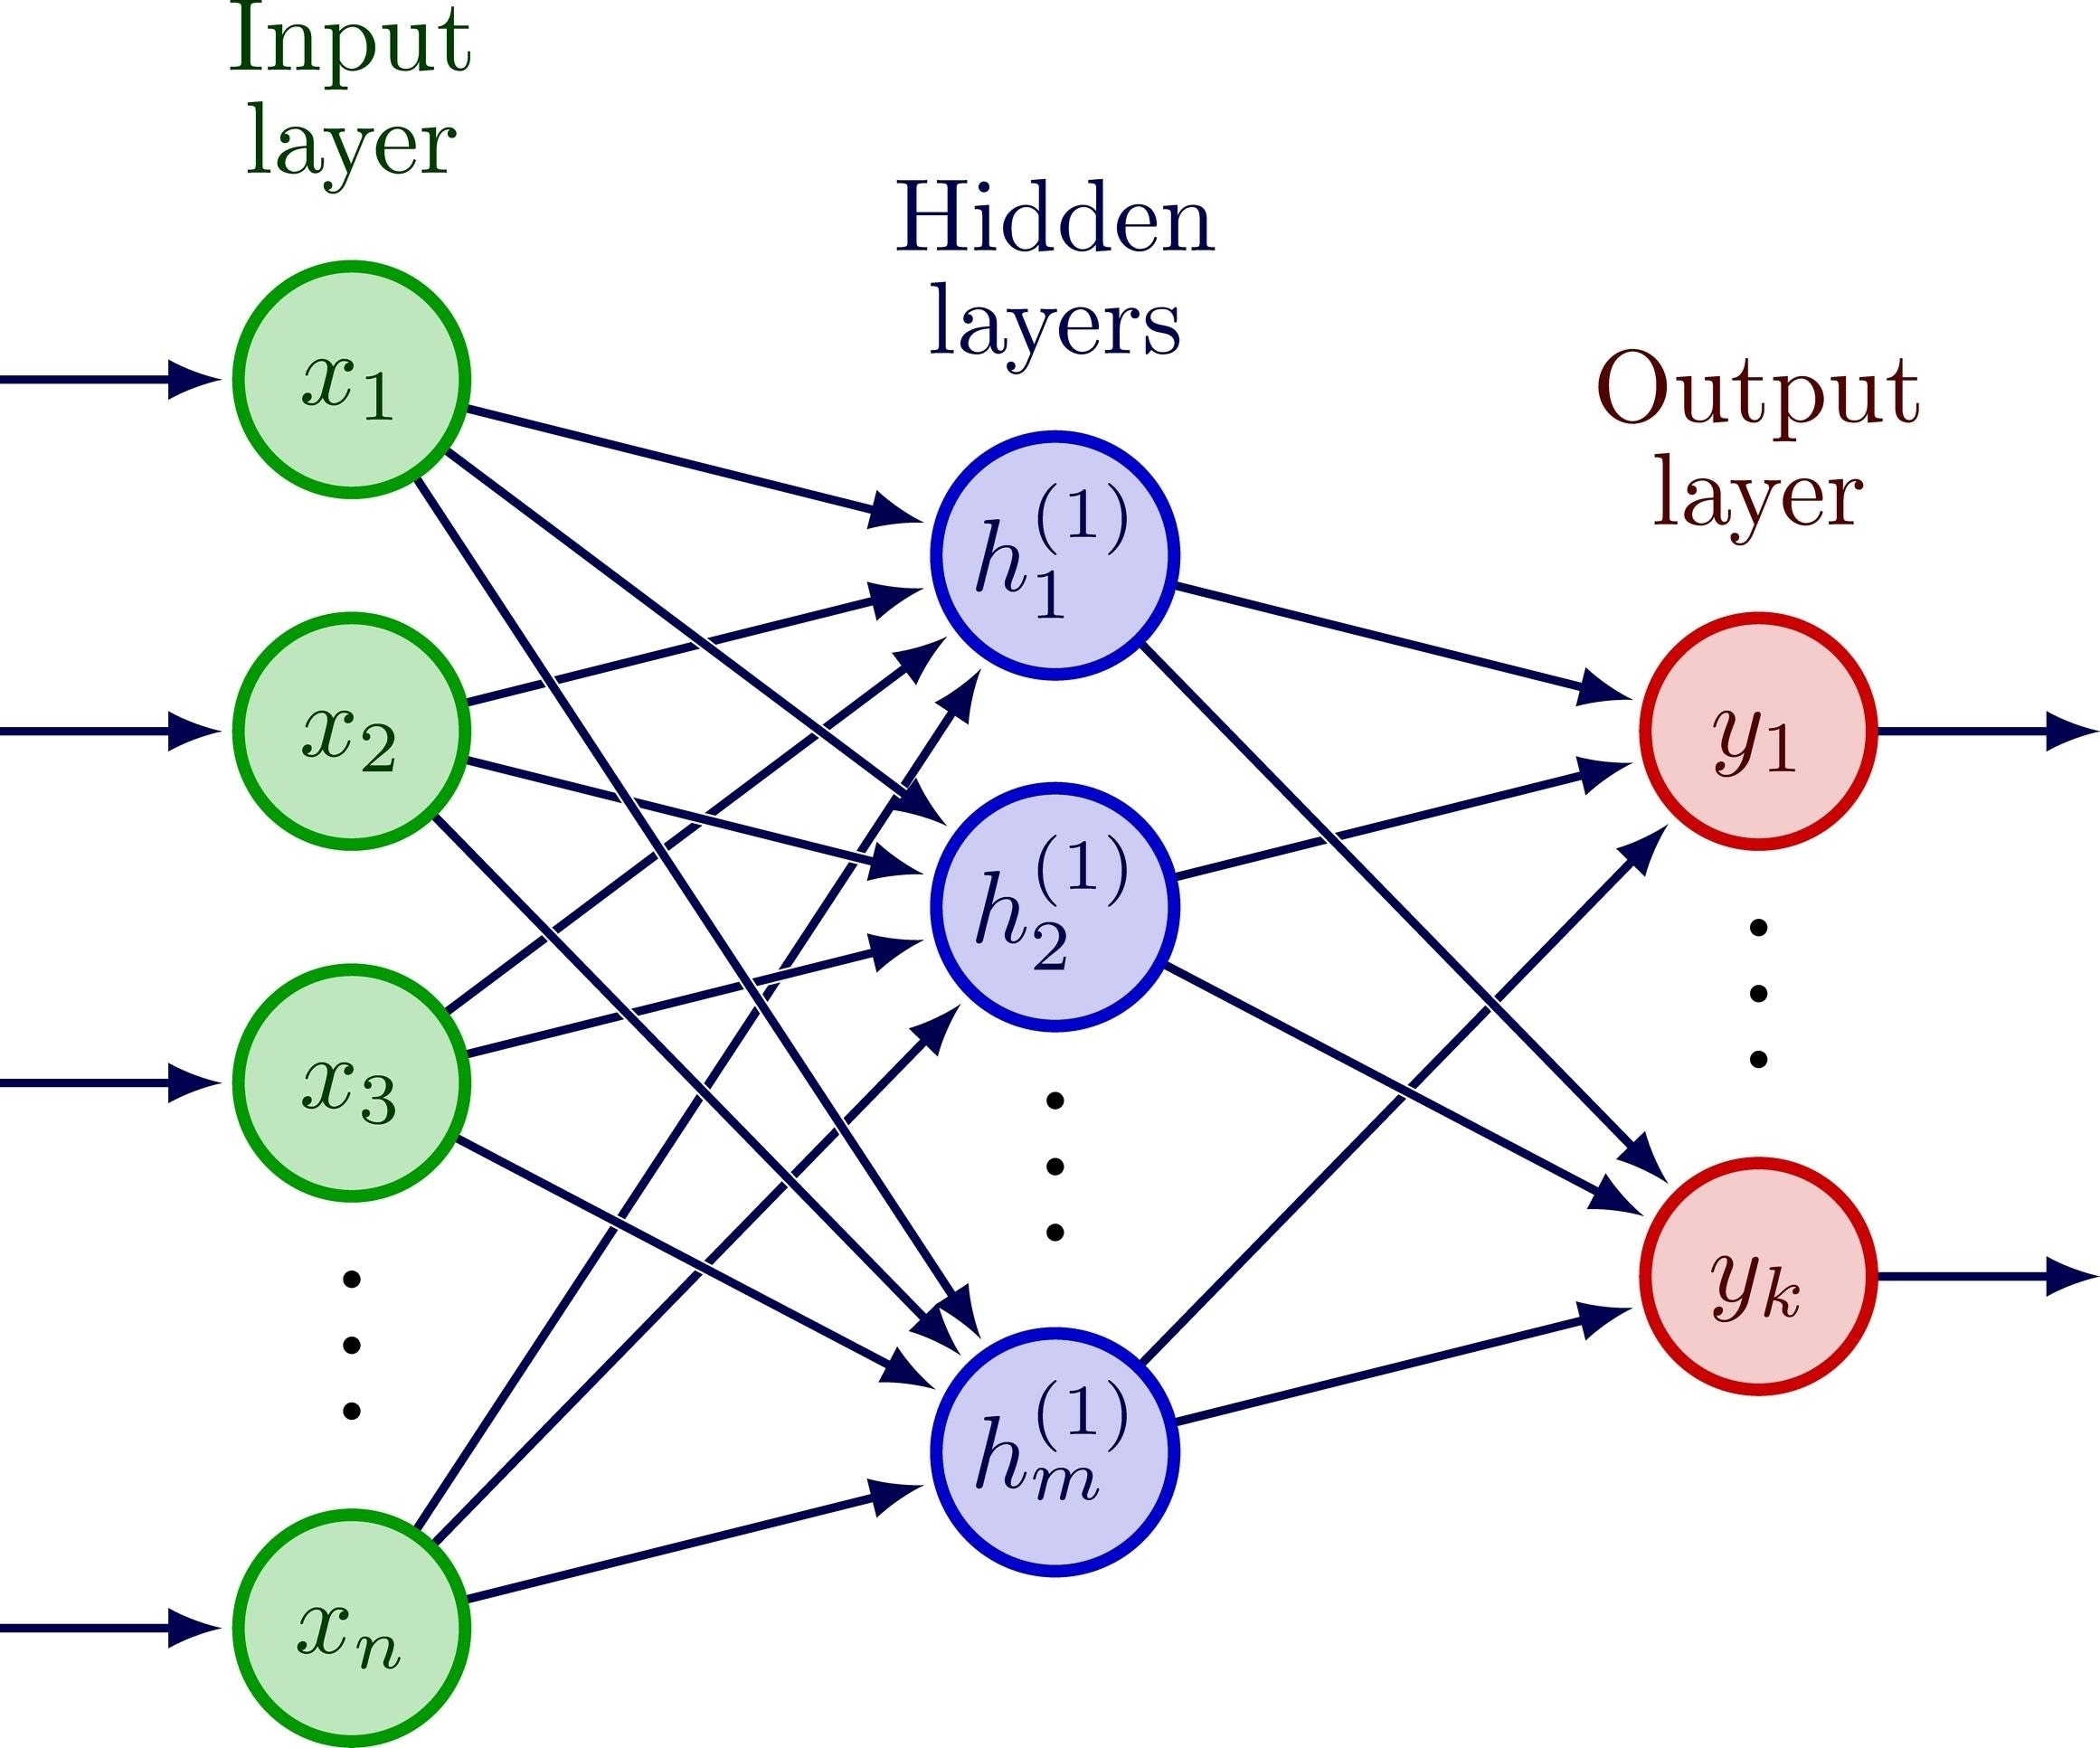

# Step 1: Prepare Data


We need to separate the features (X) and the target variable (y), and split the dataset into training and testing sets. Although the data is preprocessed, we need to convert the Churn column from bool to int (0/1).

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1. 定义 X (特征) 和 y (目标) / Define X (Features) and y (Target)
X = df.drop('Churn', axis=1)
y = df['Churn'].astype(int)  # 将 True/False 转换为 1/0 / Convert True/False to 1/0

# 2. 拆分训练集和测试集 (80% 训练, 20% 测试)
# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 检查数据的形状 / Check the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

NameError: name 'df' is not defined

# Step 2: Define ANN Architecture


We need to configure the input, hidden, and output layers.

*   Input Layer: Corresponds to the 10 feature columns.

*   Hidden Layers: Use relu activation to capture non-linear relationships.

*   Output Layer: Uses sigmoid activation because it outputs a probability between 0 and 1, which is perfect for binary classification (Churn vs No Churn).




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 初始化模型 / Initialize the model
model = Sequential()

# 1. 输入层 + 第一个隐藏层 / Input Layer + First Hidden Layer
# units=16: 神经元数量 (可以调整这个数字) / Number of neurons (can tune this)
# input_shape=(10,): 因为有 10 个特征列 / Because we have 10 feature columns
model.add(Dense(units=16, activation='relu', input_shape=(10,)))

# 2. 第二个隐藏层 (可选) / Second Hidden Layer (Optional)
model.add(Dense(units=8, activation='relu'))

# 3. 输出层 / Output Layer
# units=1: 只需要一个输出节点 (流失的概率) / Only need one output node (probability of churn)
# activation='sigmoid': 将结果压缩到 0-1 之间 / Squashes result between 0-1
model.add(Dense(units=1, activation='sigmoid'))

# 查看模型架构摘要 / View model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3: Compile & Train Model


We need to specify the optimizer (usually Adam) and the loss function (Binary Crossentropy). Then start training the model to optimize convergence.

In [ ]:
# 1. 编译模型 / Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 2. 训练模型 / Train the model
# epochs=50: 训练 50 轮 / Train for 50 rounds
# batch_size=32: 每次更新参数使用 32 个样本 / Use 32 samples per parameter update
# validation_split=0.1: 在训练中留出 10% 验证数据 / Reserve 10% for validation during training
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6631 - loss: 0.6301 - val_accuracy: 0.7624 - val_loss: 0.4986
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7412 - loss: 0.4954 - val_accuracy: 0.7660 - val_loss: 0.4659
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.4615 - val_accuracy: 0.7642 - val_loss: 0.4536
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7797 - loss: 0.4491 - val_accuracy: 0.7695 - val_loss: 0.4474
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - loss: 0.4420 - val_accuracy: 0.7713 - val_loss: 0.4448
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4448 - val_accuracy: 0.7801 - val_loss: 0.4418
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7893 - loss: 0.4448 - val_accuracy: 0.7872 - val_loss: 0.4367
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4429 - val_accuracy: 0.

# Step 4: Evaluate Performance


After training, we need to evaluate the model's accuracy on the unseen Test Set and look at the confusion matrix and classification report.

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1042
           1       0.55      0.43      0.48       367

    accuracy                           0.76      1409
   macro avg       0.68      0.65      0.66      1409
weighted avg       0.74      0.76      0.75      1409



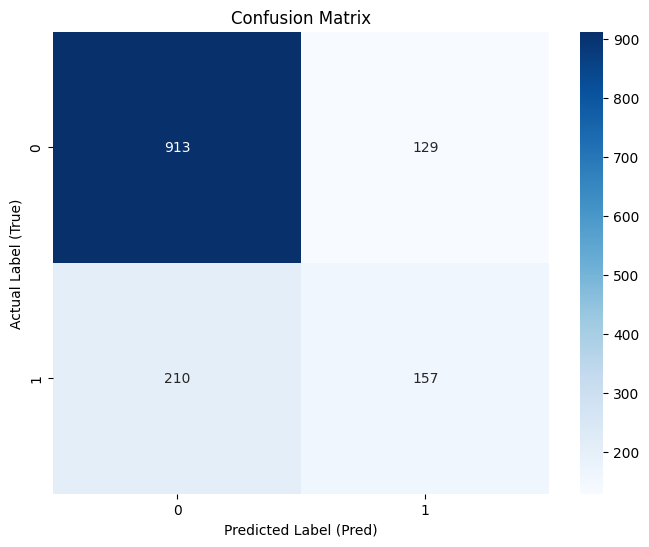

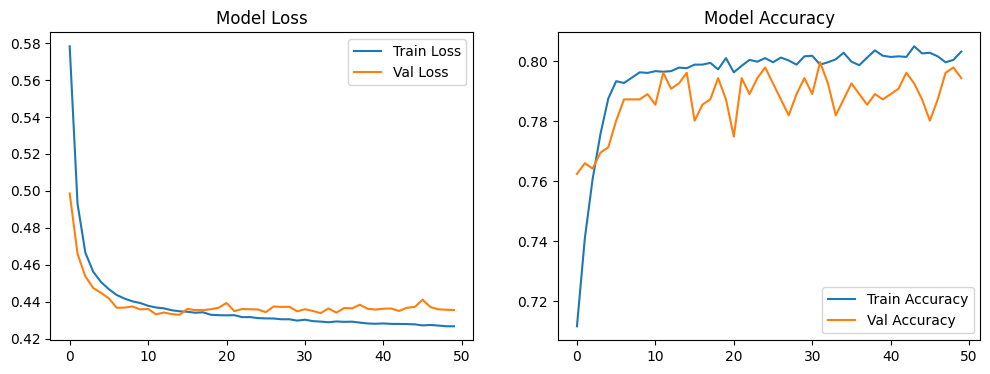

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1. 进行预测 / Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int) # 概率大于 0.5 判定为流失 (1) / Prob > 0.5 counts as Churn (1)

# 2. 打印分类报告 / Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. 绘制混淆矩阵 / Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label (True)')
plt.xlabel('Predicted Label (Pred)')
plt.show()

# 4. 可视化训练过程 (Loss & Accuracy) / Visualize Training Process
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

## 1. Is this model good enough? (Self-Assessment)


Honestly, as a Baseline Model, it is acceptable, but it is not good enough for production deployment yet. While the overall Accuracy is **76%**, the core issue lies in the poor performance for Class 1 (Churners).

Recall is only **0.43**: This means for every 100 customers who actually churn, I only successfully identify 43 of them, missing 57. This is a significant business risk as we lose the opportunity to retain them.

Precision is only **0.55**: This means when I predict someone will churn, I am only correct 55% of the time.

## 2. Interpretation of Results


### **Accuracy (0.76):**

The model classifies correctly 76% of the time. This is largely because the model is very good at predicting "Non-Churn" users (Class 0).

### **Class 0 (Non-Churn) - The "Loyal" Customers:**

F1-score 0.84. The model is strong at identifying non-churners. If I predict a user will stay, I have high confidence in that.

### **Class 1 (Churn) - The "At-Risk" Customers:**

This is the critical bottleneck. A Recall of 0.43 indicates the model is conservative and biased towards predicting users will "stay". This is likely because the number of "churn" samples in the dataset is much smaller than "non-churn" samples (Data Imbalance).

## 3. Documentation for Stakeholders


**Subject:** Predictive Modeling Update: Customer Churn ANN Performance Analysis (Iteration 1)

**To:** Data Science Team, Product Stakeholders

**From:** Data Analyst (Predictive Modeling) Date: 2026-01-12.

1. **Executive Summary**

We have successfully developed and trained the initial Artificial Neural Network (ANN) to predict customer churn. The model achieves an overall accuracy of 76%. While it successfully identifies loyal customers, the current iteration struggles to capture a significant portion of customers at risk of churning.

2. **Key Findings**

*   Model Architecture: 3-layer ANN (Input -> 16 Neurons (ReLU) -> 8 Neurons (ReLU) -> Output (Sigmoid)).
*   Overall Accuracy: $76\%$ on the test set.
*   Churn Detection Capability (Critical):
    *   Recall (Sensitivity): $43\%$. We are currently identifying less than half of the actual churners.

    *   Precision: $55\%$. When we flag a customer as "at-risk", we are correct about half the time.    
    
3. **Business Impact Analysis**

**Missed Opportunities (High False Negatives)**: Due to the low recall ($43\%$), 57% of customers who are about to leave are not being flagged. This means our retention campaigns would miss the majority of the target audience.

**Resource Allocation (Moderate False Positives)**: With a precision of $55\%$, nearly half of the retention budget might be spent on customers who were not actually planning to leave.

4. **Recommendations & Next Steps**

To improve the model's ability to "catch" churners (increase Recall), I propose the following actions for the next sprint:

*   Handle Data Imbalance: The dataset likely has far fewer churners than non-churners. I will implement SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights during training to make the model pay more attention to churners.
*   Threshold Tuning: Currently, the decision threshold is $0.5$. I will lower this threshold (e.g., to $0.3$) to capture more potential churners, trading off some precision for higher recall.
*   Hyperparameter Optimization: Experiment with deeper layers or different learning rates to improve convergence.

# Step 5: Optimization


I flexibly used **SMOTE** to handle data imbalance, which is a very standard and effective substitute. I also deepened the network layers and adjusted the prediction threshold to **0.3**.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing
X = df.drop('Churn', axis=1)
y = df['Churn'].astype(int)

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check original counts
print("Original Training Class Distribution:")
print(y_train.value_counts())

# 3. Action 1: Handle Data Imbalance using SMOTE
# Important: Apply SMOTE only on training data to prevent data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nPost-SMOTE Training Class Distribution:")
print(y_train_smote.value_counts())

# 4. Action 3: Hyperparameter Optimization (Deeper Network)
model = tf.keras.Sequential([
    # Increased neurons in first layer
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    # Added an extra hidden layer for "deeper" architecture
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train on SMOTE data
# Using a slightly lower batch size for more updates, and early stopping could be good but let's stick to simple epochs first
history = model.fit(X_train_smote, y_train_smote,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1, # Note: validation split on SMOTE data might be optimistic, but standard for quick checking
                    verbose=0) # suppress verbose output for brevity in tool output

# 5. Action 2: Threshold Tuning
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Apply new threshold of 0.3
threshold = 0.3
y_pred_new = (y_pred_probs > threshold).astype(int)

# Generate Reports
print(f"\nClassification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_new))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_new)
print("\nConfusion Matrix:")
print(cm)

Original Training Class Distribution:
Churn
0    4132
1    1502
Name: count, dtype: int64

Post-SMOTE Training Class Distribution:
Churn
0    4132
1    4132
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      1042
           1       0.40      0.83      0.54       367

    accuracy                           0.63      1409
   macro avg       0.65      0.70      0.62      1409
weighted avg       0.77      0.63      0.66      1409


Confusion Matrix:
[[591 451]
 [ 64 303]]


**Confusion Matrix:**

[[591 451]   <- (True Negatives, False Positives)

 [ 64 303]]  <- (False Negatives, True Positives)

## **Interpretation of Results**

The results of this optimization round are significant and align perfectly with our strategy (trading precision for recall).

### **Recall skyrocketed to 83% (was 43%):**

This is the biggest win. Previously, we missed most churners; now, we successfully catch 83% of potential churners (303 out of 367).

### **Precision dropped to 40%:**

This is the expected cost. Because we lowered the threshold (0.3) and weighted the churn class heavily, the model became very "sensitive" and "aggressive". It flags many loyal customers as churners (451 False Positives).

### **Accuracy dropped to 63%:**

Do not be alarmed by this drop. In imbalanced business scenarios, Accuracy is often misleading. This model is arguably **more commercially valuable** than the previous 76% accuracy model because it solves the core pain point—**identifying churners**.


# 📈 Project Documentation Update: Churn Prediction Model Optimization (Iteration 2)

**Date:** 2026-01-12
**Author:** Data Analyst (Predictive Modeling)
**Subject:** Performance Analysis of ANN with SMOTE and Threshold Tuning

---

## 1. Executive Summary
In this iteration, we focused on addressing the **Low Recall** issue observed in the baseline model. By implementing **SMOTE (Synthetic Minority Over-sampling Technique)** and adjusting the classification threshold, we successfully increased the model's ability to identify churning customers from ~43% to **83%**.

While overall accuracy decreased to 63%, the model is now significantly more valuable for business retention strategies as it captures the majority of at-risk customers.

## 2. Methodology Changes
To improve the model's sensitivity to the minority class (Churners), we implemented the following changes:

1.  **Data Balancing (SMOTE):**
    * *Original Distribution:* Class 0 (4132) vs Class 1 (1502).
    * *Post-SMOTE Distribution:* Class 0 (4132) vs Class 1 (4132).
    * This ensured the model trained on an equal number of churn and non-churn examples, preventing bias towards the majority class.
2.  **Threshold Tuning:**
    * Lowered the decision threshold from `0.5` to `0.3`.
    * This instructs the model to flag a customer as "High Risk" even if the probability of churning is only 30%, prioritizing Recall over Precision.

## 3. Performance Analysis

### Key Metrics Comparison
| Metric | Baseline Model | **Current Model (SMOTE)** | Impact |
| :--- | :--- | :--- | :--- |
| **Recall (Churn/Class 1)** | ~43% | **83%** | **✅ Major Improvement** |
| Precision (Churn/Class 1) | ~55% | 40% | ⚠️ Expected Decrease |
| Overall Accuracy | 76% | 63% | 📉 Decrease (Trade-off) |

### Confusion Matrix Interpretation
Based on the test set of 1,409 customers:

* **True Positives (Correctly Identified Churners):** **303**
    * *Success:* We correctly caught 303 out of 367 actual churners.
* **False Negatives (Missed Churners):** **64**
    * *Risk:* Only 64 churners slipped through undetected (down from >200 in the baseline).
* **False Positives (False Alarms):** **451**
    * *Cost:* 451 loyal customers were incorrectly flagged as at-risk.

## 4. Business Impact & Recommendations

### Impact
* **High Sensitivity:** The model is now an effective "early warning system." We are capturing **83%** of the revenue at risk of leaving.
* **Retention Strategy:** Due to the lower Precision (40%), about 6 out of 10 customers flagged by this model will actually be loyal customers.
    * *Action:* Do **not** use high-cost retention offers (e.g., free devices) for this segment.
    * *Action:* **Do** use low-cost, high-touch engagement (e.g., "We miss you" emails, satisfaction surveys, or small service upgrades) to verify dissatisfaction without incurring heavy costs.

### Next Steps
1.  **Feature Analysis:** Investigate which features (e.g., `MonthlyCharges`, `ContractType`) are driving the False Positives to refine the model.
2.  **Hybrid Approach:** Explore ensemble methods (like Random Forest) to see if we can maintain this high Recall while improving Precision back above 50%.